In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)

In [104]:
data = pd.read_csv('data_set.csv', delimiter=';')

In [105]:
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0,0,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0,1,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0,0,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0,1,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0,1,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

In [107]:
# Create the dataset
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + np.random.RandomState(1).normal(0, 0.1, X.shape[0]) + 3 # в конце добавляем шум (н. распр)

In [108]:
X[:5]

array([[0.        ],
       [0.03015075],
       [0.06030151],
       [0.09045226],
       [0.12060302]])

In [109]:
y[:5]

array([3.16243454, 3.14888995, 3.36141453, 3.49949366, 3.86895208])

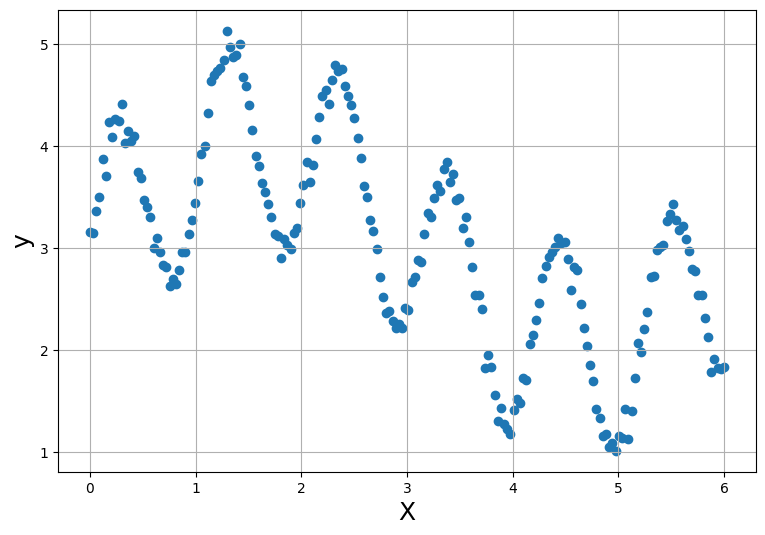

In [110]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], y)

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.grid()
plt.show()

In [111]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [112]:
# Import kNN regressor
from sklearn.neighbors import KNeighborsRegressor

# Create object of the regressor's class
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the regressor
knn_reg.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [113]:
# Import Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

# Create object of the regressor's class
dt_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=4,
                            min_samples_split=2, min_samples_leaf=1)

# Fit the regressor
dt_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [114]:
# Import Linear Regression regressor
from sklearn.linear_model import LinearRegression

# Create object of the regressor's class
linreg = LinearRegression()

# Fit the regressor
linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [115]:
# kNN
y_test_knn_reg = knn_reg.predict(X_test)

# DT
y_test_dt_reg = dt_reg.predict(X_test)

# LinReg
y_test_linreg = linreg.predict(X_test)

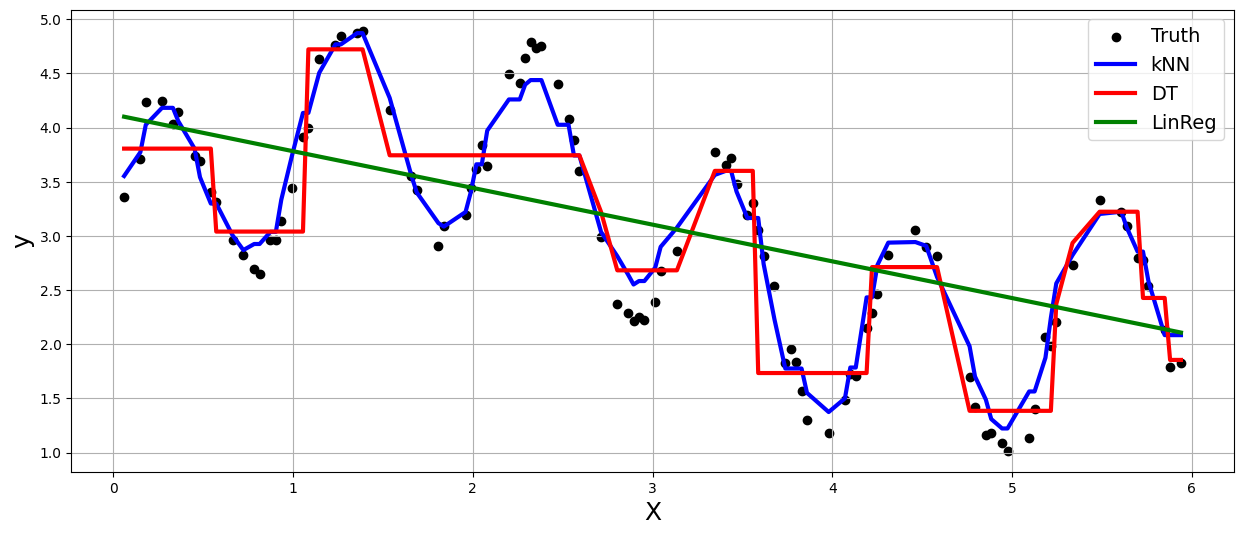

In [116]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test[:, 0], y_test, color='0', label='Truth')

sortd_inds = np.argsort(X_test[:, 0])
plt.plot(X_test[sortd_inds, 0], y_test_knn_reg[sortd_inds], linewidth=3, color='b', label='kNN')
plt.plot(X_test[sortd_inds, 0], y_test_dt_reg[sortd_inds], linewidth=3, color='r', label='DT')
plt.plot(X_test[sortd_inds, 0], y_test_linreg[sortd_inds], linewidth=3, color='g', label='LinReg')

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# функция расчет метрик
def regression_quality_metrics_report(y_true, y_pred):
    # корень из среднеквдратичной ошибки (штрафует большие ошибки, чем меньше тем лучше)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # средняя абсолютная ошибка (более устойчива к выбросам)
    mae = mean_absolute_error(y_true, y_pred)
    # относительная квадратичная ошибк (помогает сравнивать модели на разных наборах данных)
    rse = np.sqrt(np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    # относительная абсолютная ошибка (то же самое, только для абсолютных ошибок)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))
    # средняя абсолютная процентная ошибка (ср процент ошибки м/у прогнозом и реальными данными)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    # среднеквадратичная логарифмическая ошибка (менее чувствительна к большим значениям)
    rmsle = np.sqrt(mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1)))

    return [rmse, mae, rse, rae, mape, rmsle]

In [118]:
metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])

metrics_report.loc['kNN', :] = regression_quality_metrics_report(y_test, y_test_knn_reg)
metrics_report.loc['DT', :] = regression_quality_metrics_report(y_test, y_test_dt_reg)
metrics_report.loc['LinReg', :] = regression_quality_metrics_report(y_test, y_test_linreg)

metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
kNN,0.19583,0.159362,0.190348,0.188582,6.718356,0.057459
DT,0.42662,0.326301,0.414677,0.386131,11.914812,0.112371
LinReg,0.80769,0.685106,0.785079,0.810726,29.634749,0.223014
